In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

import pandas as pd
import numpy as np

import os
import pickle

from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt 
%matplotlib inline

import sys
sys.path.append('..')

from src.utils import train_test_anomaly

In [56]:
file_direc = '../datasets/Dodgers/101-freeway-traffic.test.out'

In [57]:
data = pd.read_csv(file_direc)

In [58]:
new_column_names = {'-1': 'value', '1': 'anomaly'}

data.rename(columns=new_column_names, inplace=True)

In [59]:
train_data, test_data = train_test_anomaly(data)

In [60]:
train_np = train_data['value'].to_numpy()
train_np = train_np.reshape(-1, 1)

In [61]:
if_model = IsolationForest(n_estimators=100, contamination=float(0.1113))  # n_estimators: No. of Independent Isolation Trees, contamination: proportion of anomalies, should be between 0 - 0.5. 

In [62]:
if_model.fit(train_np)

IsolationForest(contamination=0.1113)

Evaluation of Isolation Forest Model

In [63]:
test_np = test_data['value'].to_numpy()
test_np = test_np.reshape(-1, 1)

In [64]:
anomaly_scores = if_model.decision_function(test_np)

In [101]:
threshold = []

for x in anomaly_scores:

    if x < -0.03:
        threshold.append(1)
    
    else:
        threshold.append(0)

thres_np = np.array(threshold)
thres_np.reshape(-1, 1)

thres_np.shape

(15188,)

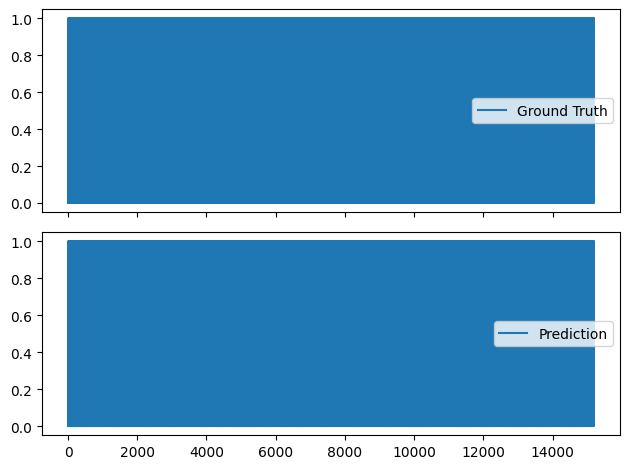

In [102]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(test_data.index, test_data['anomaly'], label = 'Ground Truth')
ax1.legend()

ax2.plot(test_data.index, thres_np, label = 'Prediction')
ax2.legend()

plt.tight_layout()

plt.show()

In [103]:
gtruth_np = test_data['anomaly'].to_numpy()

gtruth_np = gtruth_np.reshape(-1, 1)

In [104]:
prec = precision_score(gtruth_np, thres_np, pos_label=1)
recall = recall_score(gtruth_np, thres_np, pos_label=1)
f1 = f1_score(gtruth_np, thres_np, pos_label=1)

In [105]:
print(f'Precsion Score: {prec:.4f}  Recall: {recall:.4f}  f1_score: {f1:.4f}')

Precsion Score: 0.8565  Recall: 0.5359  f1_score: 0.6593


In [100]:
file_name = f'../saved_models/iforest_dodgers_v2.sav'

pickle.dump(if_model, open(file_name, 'wb'))